In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import h5py
import fn_HAZUS_loss 
%matplotlib inline

Text(0.55, 0.7153807408395861, 'P(DS = $ds_1$) = 0.3')

<Figure size 432x288 with 0 Axes>

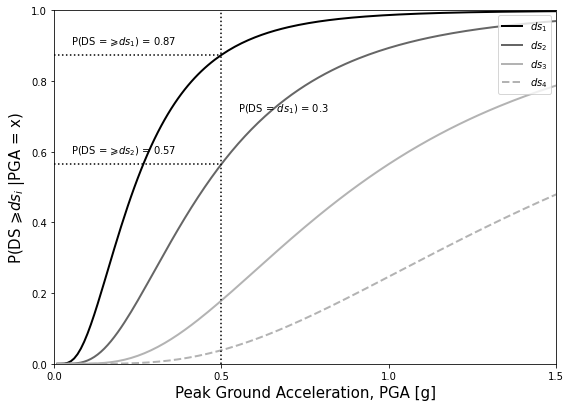

In [2]:
# PGA values of interest
pgaVals = np.arange(0.01, 1.51, 0.01).tolist()

# Example value
pgaEx = 0.5

# specify a text case (see fn_HAZUS_loss for allowable options)
analysisCase = {'codeLevel' : 0, 'buildingType' : 'C2L', 'occType' : 'COM1'}

# Load data created by import_HAZUS_data.m
hf = h5py.File('hazusData.h5', 'r')
# rename weight vector to avoid ambiguity
medians = hf.get('medians')
betas = hf.get('betas')
lossStruct = hf.get('lossStruct')
lossAccNS = hf.get('lossAccNS')
lossDriftNS = hf.get('lossDriftNS')

# Find index for building type
buildingTypeCode = ['W1', 'W2', 'S1L', 'S1M', 'S1H', 'S2L', 'S2M', 'S2H', 'S3', 'S4L', 'S4M', 'S4H', 'S5L', 'S5M', 'S5H', 'C1L', 'C1M', 'C1H', 'C2L', 'C2M', 'C2H', 'C3L', 'C3M', 'C3H', 'PC1', 'PC2L', 'PC2M', 'PC2H', 'RM1L', 'RM1M', 'RM2L', 'RM2M', 'RM2H', 'URML', 'URMM', 'MH']
idxBldg = buildingTypeCode.index(analysisCase['buildingType'])

# Find index for occupancy type
occCode = ['RES1', 'RES2', 'RES3', 'RES4', 'RES5', 'RES6', 'COM1', 'COM2', 'COM3', 'COM4', 'COM5', 'COM6', 'COM7', 'COM8', 'COM9', 'COM10', 'IND1', 'IND2', 'IND3', 'IND4', 'IND5', 'IND6', 'AGR1', 'REL1', 'GOV1', 'GOV2', 'EDU1', 'EDU2']
idxOcc = occCode.index(analysisCase['occType'])

# Get fragility parameters for the given structure type and code level
medianDS = medians[analysisCase['codeLevel']].tolist()[idxBldg]
betaDS = betas[analysisCase['codeLevel']].tolist()[idxBldg]

# Make sure an appropriate occupancy type was specified
assert ~np.isnan(medianDS[0]), 'Error, this building type and code level is not allowed' 

# Example numbers
p1 = norm.cdf(np.log(pgaEx), np.log(medianDS[0]), betaDS[0])
p2 = norm.cdf(np.log(pgaEx), np.log(medianDS[1]), betaDS[1])
p1_Equal = p1 - p2

# Plot Fig 9.2
plt.figure(1)
plt.figure(figsize=(9, 6.5))
plt.plot(pgaVals, norm.cdf(np.log(pgaVals), np.log(medianDS[0]), betaDS[0]), 'k-', label='$ds_1$', linewidth=2)
plt.plot(pgaVals, norm.cdf(np.log(pgaVals), np.log(medianDS[1]), betaDS[1]), color=[0.4, 0.4, 0.4], linestyle='-', label='$ds_2$', linewidth=2)
plt.plot(pgaVals, norm.cdf(np.log(pgaVals), np.log(medianDS[2]), betaDS[2]), color=[0.7, 0.7, 0.7], linestyle='-', label='$ds_3$', linewidth=2)
plt.plot(pgaVals, norm.cdf(np.log(pgaVals), np.log(medianDS[3]), betaDS[3]), color=[0.7, 0.7, 0.7], linestyle='--', label='$ds_4$', linewidth=2)
plt.plot([pgaEx, pgaEx], [0, 1], ':k')
plt.plot([0, pgaEx], [p1, p1], ':k')
plt.plot([0, pgaEx], [p2, p2], ':k')       
plt.xlim(0, 1.5)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 2, step = 0.5))
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Peak Ground Acceleration, PGA [g]', fontsize=15)
plt.ylabel('P(DS $\geqslant ds_i$ |PGA = x)', fontsize=15)

# annotate text results for example cases
text3 = 'P(DS = $ds_1$) = ' + f"{p1_Equal:.1f}"
text1 = 'P(DS = $\geqslant ds_1$) = ' + f"{p1:.2f}"
text2 = 'P(DS = $\geqslant ds_2$) = ' + f"{p2:.2f}"
plt.text(0.05, p1+0.03, text1, fontsize=10)
plt.text(0.05, p2+0.03, text2, fontsize=10)
plt.text(0.55, p2+0.15,text3, fontsize=10)


Text(0.56, 0.12, 'PGA = 0.5 g, \nLoss Ratio = 0.14')

<Figure size 432x288 with 0 Axes>

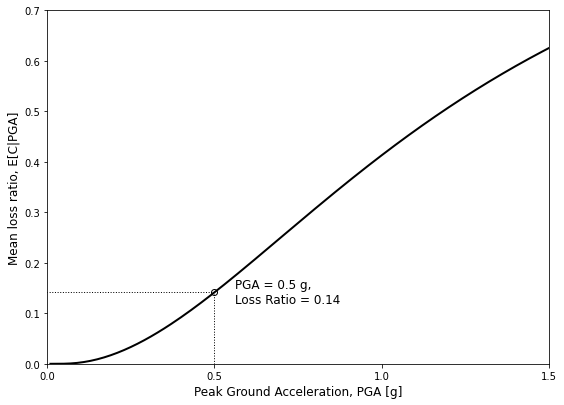

In [3]:
### Loss ratios for the given occupancy type
lossStruct  = lossStruct[idxOcc]
lossAccNS   = lossAccNS[idxOcc]
lossDriftNS = lossDriftNS[idxOcc]

### Example numbers for text
# loss ratios given DS
lossTotal = [lossStruct, lossAccNS, lossDriftNS]
lossTotal = np.sum(lossTotal, 0) / 100
# Probabilities of each DS, given PGA
probForDS = -1 * np.diff([1] + norm.cdf(np.log(pgaEx), np.log(medianDS), betaDS).tolist() + [0])

# Calculate loss ratio (total loss) for all PGAs
lossRatio, _, _, _, _ = fn_HAZUS_loss.fn_HAZUS_loss(analysisCase, pgaVals)
lossEx, _, _, _, _ = fn_HAZUS_loss.fn_HAZUS_loss(analysisCase, pgaEx) # value for specific case (without rounding)

# Plot Fig 9.6
plt.figure(2)
plt.figure(figsize=(9, 6.5))
plt.plot(pgaVals, lossRatio, '-k', linewidth=2)
plt.plot([pgaEx, pgaEx, 0], [0, lossEx, lossEx], ':k', linewidth=1)
plt.plot(pgaEx, lossEx, 'ok', fillstyle='none', linewidth=1)
plt.xlim(0, 1.5)
plt.ylim(0, 0.7)
plt.xticks(np.arange(0, 2, step = 0.5))
plt.xlabel('Peak Ground Acceleration, PGA [g]', fontsize=12)
plt.ylabel('Mean loss ratio, E[C|PGA]', fontsize=12)
plt.text(0.56, 0.12, 'PGA = 0.5 g, \nLoss Ratio = 0.14', fontsize=12)
